# Softmax classification on MNIST in Keras (with additional feature) 

In [0]:
import numpy as np

In [0]:
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 5s 0us/step


# Preparing data

In [0]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 # Normalize

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

**One-hot/categorical encoding the labels**

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

In [0]:
print(train_images_original.shape)
print(train_images.shape)
print(train_labels_original.shape)
print(train_labels.shape)
print(train_labels[0])
print(train_labels_original[0])
print(test_images.shape)
#print(train_images[0])

(60000, 28, 28)
(60000, 784)
(60000,)
(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5
(10000, 784)


**Obtain black and white images**

In [0]:
# Round the grey values of the images to 1 and 0

for i in range(train_images.shape[0]):
  for j in range (train_images.shape[1]):
    if train_images[i,j] > 0:
      train_images[i,j] = 1
      
for i in range(test_images.shape[0]):
  for j in range (test_images.shape[1]):
    if test_images[i,j] > 0:
      test_images[i,j] = 1

In [0]:
print(train_images.shape)
print(test_images.shape)
#print(train_images[0])
#print()
#print(test_images[0])

(60000, 784)
(10000, 784)


**Add an additional feature: number of white regions**

In [0]:
# Number of white regions: 0 has 2, 1 has 1, 2 has 1, 3 has 1, 4 has 2, 5 has 1, 6 has 2, 7 has 1, 8 has 3, 9 has 2

additional_train_features = np.zeros((60000, 1))
additional_test_features = np.zeros((10000, 1))

# Arrays containing the additional feature (one for train, one for test)
for i in range(additional_train_features.shape[0]):
  if train_labels_original[i] in [1, 2, 3, 5, 7]:
    additional_train_features[i][0] = 1
  if train_labels_original[i] in [0, 4, 6, 9]:
    additional_train_features[i][0] = 2
  if train_labels_original[i] in [8]:
    additional_train_features[i][0] = 3
    
for i in range(additional_test_features.shape[0]):
  if test_labels_original[i] in [1, 2, 3, 5, 7]:
    additional_test_features[i][0] = 1
  if test_labels_original[i] in [0, 4, 6, 9]:
    additional_test_features[i][0] = 2
  if test_labels_original[i] in [8]:
    additional_test_features[i][0] = 3

**Normalize the new features**

In [0]:
print(additional_train_features.shape)
print(additional_test_features.shape)
#print(additional_train_features)
#print()
#print(additional_test_features)

# Normalize
additional_train_features_norm = additional_train_features / 3. # Normalize to between 0 and 1
additional_test_features_norm = additional_test_features / 3.

#print(additional_train_features_norm)
#print()
#print(additional_test_features_norm)

(60000, 1)
(10000, 1)


**Add the new features to the original image data by array concatenation**

In [0]:
new_train_images = np.concatenate((train_images, additional_train_features_norm), axis=1)
new_test_images = np.concatenate((test_images, additional_test_features_norm), axis=1)

print(new_train_images.shape)
print(new_test_images.shape) # 785 = 784 + 1
#print(new_train_images[1])
#print()
#print(new_test_images[10])

(60000, 785)
(10000, 785)


# Model

In [0]:
from keras import models
from keras import layers
from keras import optimizers

classifier = models.Sequential()
classifier.add(layers.Dense(10, activation='softmax', input_shape=(785,))) # input layer: 785 input neurons
classifier.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7860      
Total params: 7,860
Trainable params: 7,860
Non-trainable params: 0
_________________________________________________________________


**Compile the model with SGD and categorical cross entropy**

In [0]:
sgd = optimizers.SGD(lr=0.1, momentum=0.0, decay=0.0, nesterov=False)
classifier.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Training

In [0]:
epochs = 30
# training images and test images with the additional feature 
history = classifier.fit(new_train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(new_test_images, test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 2s 29us/step - loss: 0.5079 - acc: 0.8628 - val_loss: 0.3466 - val_acc: 0.9046
Epoch 2/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3369 - acc: 0.9044 - val_loss: 0.3074 - val_acc: 0.9160
Epoch 3/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.3055 - acc: 0.9130 - val_loss: 0.2900 - val_acc: 0.9205
Epoch 4/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.2869 - acc: 0.9193 - val_loss: 0.2753 - val_acc: 0.9246
Epoch 5/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.2735 - acc: 0.9227 - val_loss: 0.2671 - val_acc: 0.9275
Epoch 6/30
60000/60000 [==============================] - 1s 19us/step - loss: 0.2632 - acc: 0.9257 - val_loss: 0.2555 - val_acc: 0.9327
Epoch 7/30
60000/60000 [==============================] - 1s 19us/step - loss: 0

# Display the training/test loss/accuracy

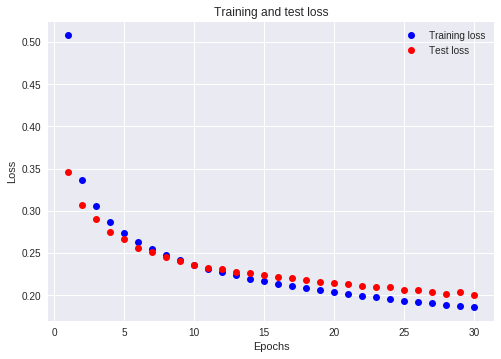

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

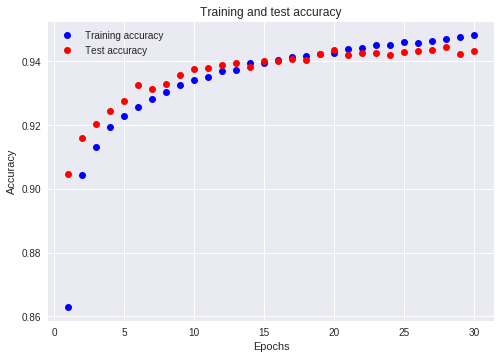

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()